#### Смотрим количество границ на каждой картине

In [59]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from tqdm import tqdm

In [23]:
load_dotenv()
folder_path = os.getenv('file_path_Munch')

In [24]:
def process_images(folder_path):
    results = {}
    
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpeg', '.jpg', '.png')):
            filepath = os.path.join(folder_path, filename)
            
            image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            edges = cv2.Canny(image, 100, 200)
            edge_length = np.sum(edges > 0)
            height, width = image.shape
            area = height * width
            normalized_length = edge_length / area
            
            results[filename] = normalized_length
    
    return results

def plot_results(results):
    filenames = list(results.keys())
    values = list(results.values())
    bar_width = 1.5
    plt.figure(figsize=(50, 10))
    plt.bar(filenames, values, color='skyblue', width=bar_width)
    plt.xlabel('Название файла')
    plt.ylabel('Длина линии (нормализованная)')
    plt.title('Распределение длины линии (нормализованной) на изображениях')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [25]:
res = process_images(folder_path)

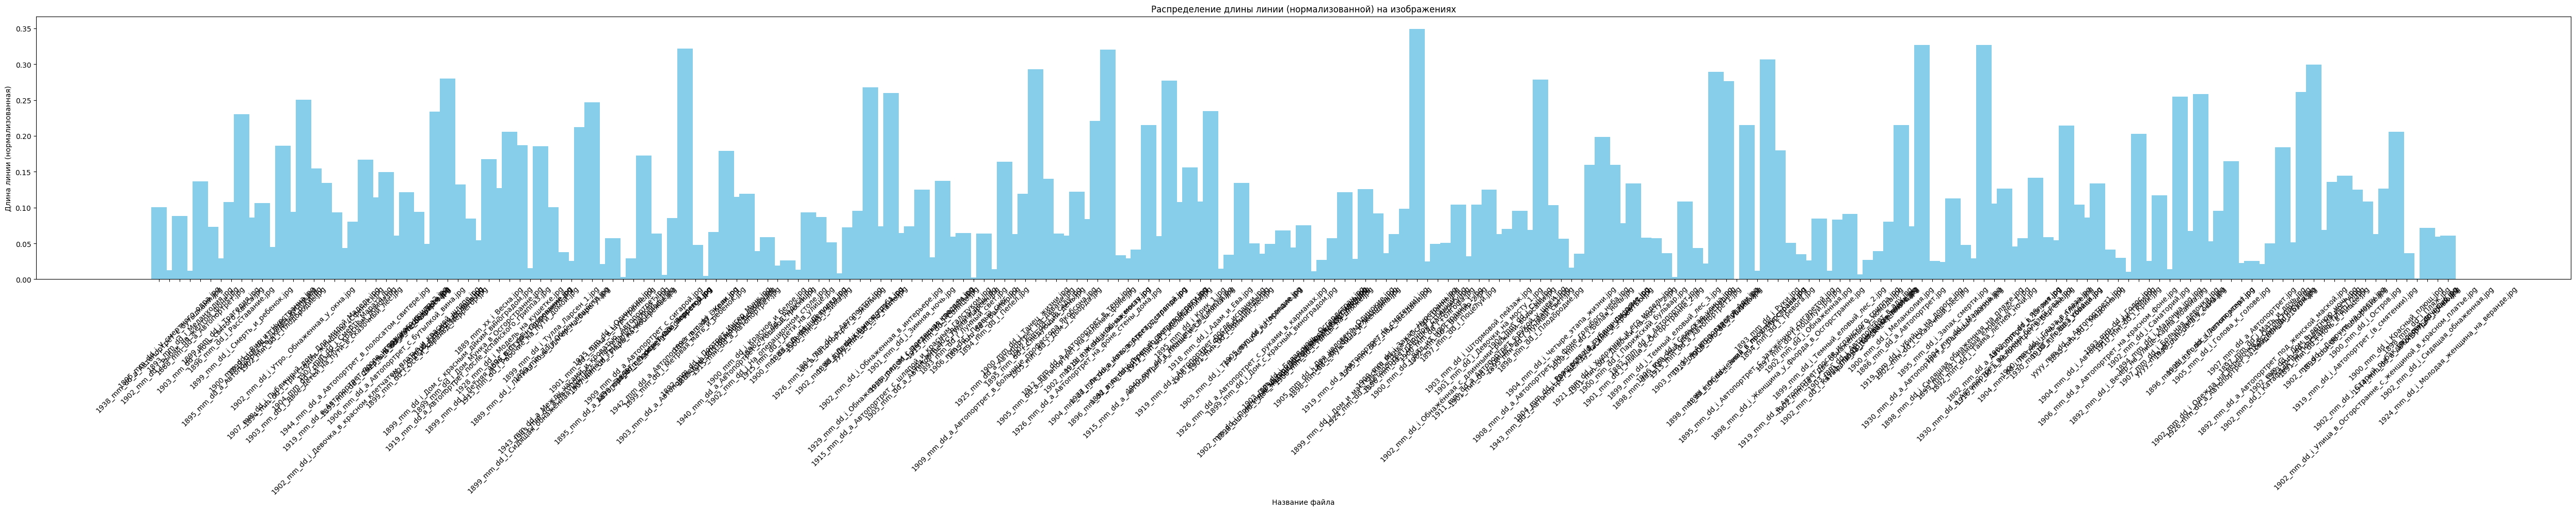

In [26]:
plot_results(res)

#### Смотрим количество границ на картинах за год

In [28]:
def process_images(folder_path):
    results = {}

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpeg', '.jpg', '.png')):
            filepath = os.path.join(folder_path, filename)
            year = filename.split('_')[0]
            if year == "yyyy":
                continue

            image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (128, 128))

            edges = cv2.Canny(image, 100, 200)
            edge_length = np.sum(edges > 0)
            height, width = image.shape
            area = height * width

            normalized_length = edge_length / area

            if year in results:
                results[year].append(normalized_length)
            else:
                results[year] = [normalized_length]

    averaged_results = {year: np.mean(values) for year, values in results.items()}

    sorted_results = dict(sorted(averaged_results.items(), key=lambda x: int(x[0])))

    return sorted_results

In [29]:
def plot_results(results):
    years = list(results.keys())
    values = list(results.values())
    bar_width = 0.5
    plt.figure(figsize=(10, 5))
    plt.bar(years, values, color='skyblue', width=bar_width)
    plt.xlabel('Год')
    plt.ylabel('Средняя длина линии (нормализованная)')
    plt.title('Средняя длина линии (нормализованная) по годам')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [30]:
res = process_images(folder_path)

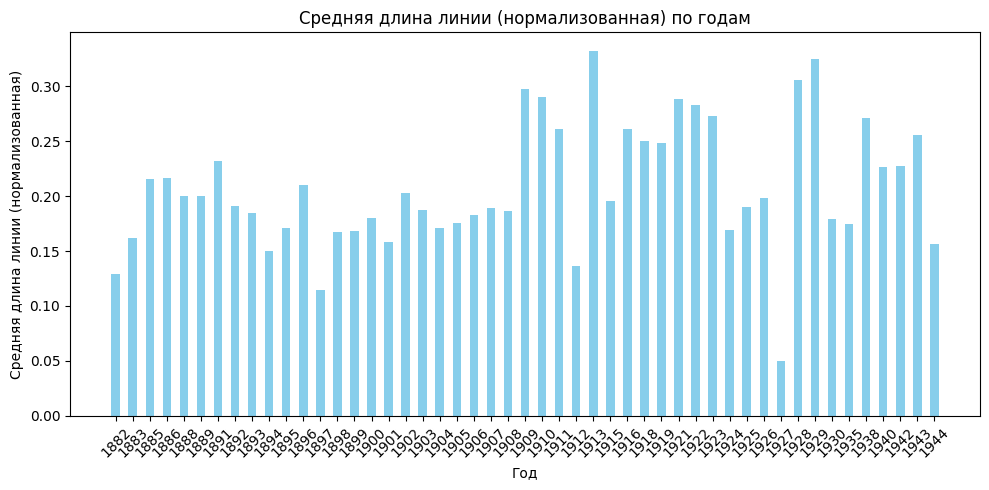

In [31]:
plot_results(res)

#### Смотрим количество прямых линий на картинах за год

In [32]:
def process_images(folder_path):
    results = {}

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpeg', '.jpg', '.png')):
            filepath = os.path.join(folder_path, filename)
            year = filename.split('_')[0]
            if year == "yyyy":
                continue

            image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (128, 128))
            edges = cv2.Canny(image, 100, 200)

            lines = cv2.HoughLinesP(edges, 
                                    1, # шаг в пикселях по оси x
                                    np.pi / 180, # шаг в радианах по углу
                                    threshold=50, # минимальное количество точек на линии
                                    minLineLength=50, # минимальная длина линии
                                    maxLineGap=10) # максимальный разрыв между частями линии
            num_lines = len(lines) if lines is not None else 0

            height, width = image.shape
            area = height * width
            normalized_lines = num_lines / area

            if year in results:
                results[year].append(normalized_lines)
            else:
                results[year] = [normalized_lines]

    averaged_results = {year: np.mean(values) for year, values in results.items()}
    sorted_results = dict(sorted(averaged_results.items(), key=lambda x: int(x[0])))
    
    return sorted_results

In [33]:
def plot_results(results):
    years = list(results.keys())
    values = list(results.values())
    bar_width = 0.5
    plt.figure(figsize=(10, 5))
    plt.bar(years, values, color='skyblue', width=bar_width)
    plt.xlabel('Год')
    plt.ylabel('Среднее количество линий (нормализованное)')
    plt.title('Среднее количество линий (нормализованное) по годам')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [35]:
res = process_images(folder_path)

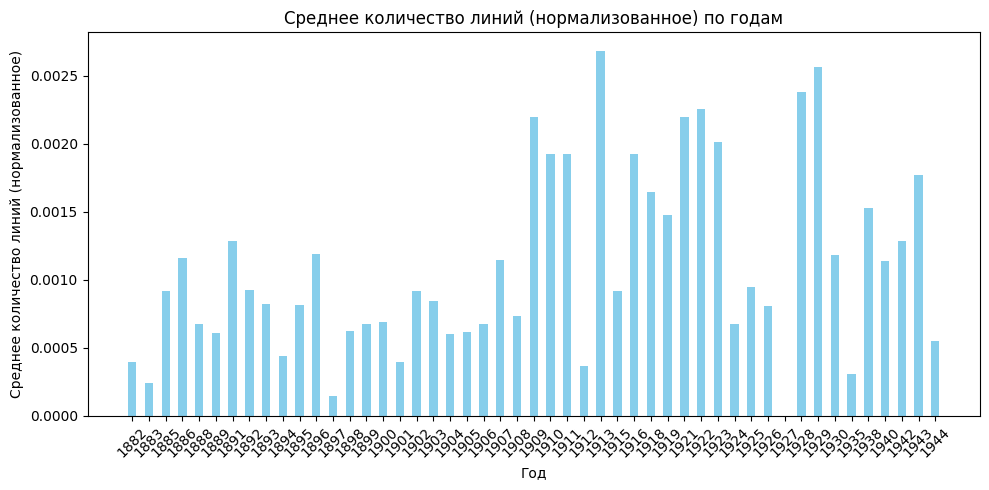

In [36]:
plot_results(res)

In [37]:
def process_images(folder_path):
    results = {}

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpeg', '.jpg', '.png')):
            filepath = os.path.join(folder_path, filename)
            year = filename.split('_')[0]
            if year == "yyyy":
                continue

            image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (128, 128))
            edges = cv2.Canny(image, 100, 200)

            lines = cv2.HoughLinesP(edges, 
                                    1, # шаг в пикселях по оси x
                                    np.pi / 180, # шаг в радианах по углу
                                    threshold=10, # минимальное количество точек на линии
                                    minLineLength=10, # минимальная длина линии
                                    maxLineGap=10) # максимальный разрыв между частями линии
            num_lines = len(lines) if lines is not None else 0

            height, width = image.shape
            area = height * width
            normalized_lines = num_lines / area

            if year in results:
                results[year].append(normalized_lines)
            else:
                results[year] = [normalized_lines]

    averaged_results = {year: np.mean(values) for year, values in results.items()}
    sorted_results = dict(sorted(averaged_results.items(), key=lambda x: int(x[0])))
    
    return sorted_results

In [38]:
res = process_images(folder_path)

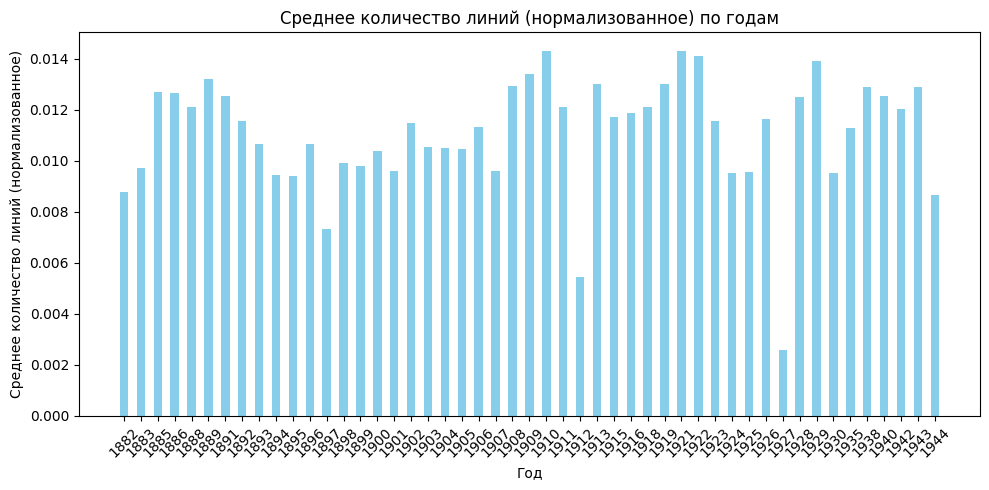

In [39]:
plot_results(res)

#### Смотрим длину прямых линий за год

In [40]:
def process_images(folder_path):
    results = {}

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpeg', '.jpg', '.png')):
            filepath = os.path.join(folder_path, filename)
            year = filename.split('_')[0]
            if year == "yyyy":
                continue

            image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (128, 128))
            edges = cv2.Canny(image, 50, 150)

            lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=50, maxLineGap=10)

            total_line_length = 0
            if lines is not None:
                for line in lines:
                    x1, y1, x2, y2 = line[0]
                    length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2) # length of a line
                    total_line_length += length

            if year in results:
                results[year].append(total_line_length)
            else:
                results[year] = [total_line_length]

    averaged_results = {year: np.mean(values) for year, values in results.items()}
    sorted_results = dict(sorted(averaged_results.items(), key=lambda x: int(x[0])))

    return sorted_results

In [42]:
def plot_results(results):
    years = list(results.keys())
    values = list(results.values())
    bar_width = 0.5
    plt.figure(figsize=(10, 5))
    plt.bar(years, values, color='skyblue', width=bar_width)
    plt.xlabel('Год')
    plt.ylabel('Средняя длина линии')
    plt.title('Средняя длина линии по годам')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [43]:
res = process_images(folder_path)

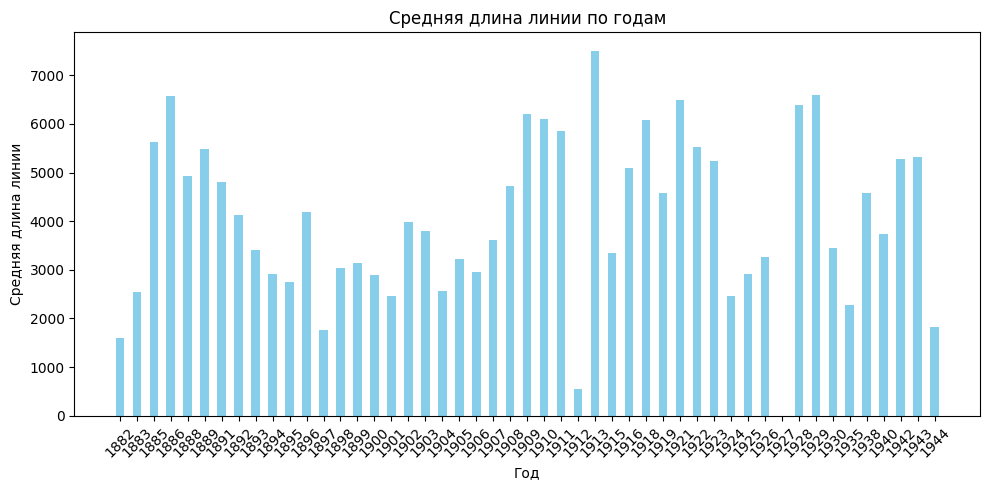

In [44]:
plot_results(res)

#### Смотрим количество кружков на каждой картине

In [54]:
def process_images(folder_path):
    results = {}

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpeg', '.jpg', '.png')):
            filepath = os.path.join(folder_path, filename)

            image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (128, 128))

            blurred = cv2.GaussianBlur(image, (9, 91), 2)

            circles = cv2.HoughCircles(
                blurred, 
                cv2.HOUGH_GRADIENT, 
                dp=1.2, 
                minDist=20, 
                param1=50, 
                param2=30, 
                minRadius=10, 
                maxRadius=100
            )

            num_circles = 0 if circles is None else len(circles[0])

            results[filename] = num_circles

    return results

In [55]:
def plot_results(results):
    filenames = list(results.keys())
    values = list(results.values())
    bar_width = 0.5
    plt.figure(figsize=(50, 10))
    plt.bar(filenames, values, color='skyblue', width=bar_width)
    plt.xlabel('Название файла')
    plt.ylabel('Количество кругов')
    plt.title('Количество кругов на изображениях')
    plt.xticks(rotation=45, fontsize=8)
    plt.tight_layout()
    plt.show()

In [56]:
results = process_images(folder_path)

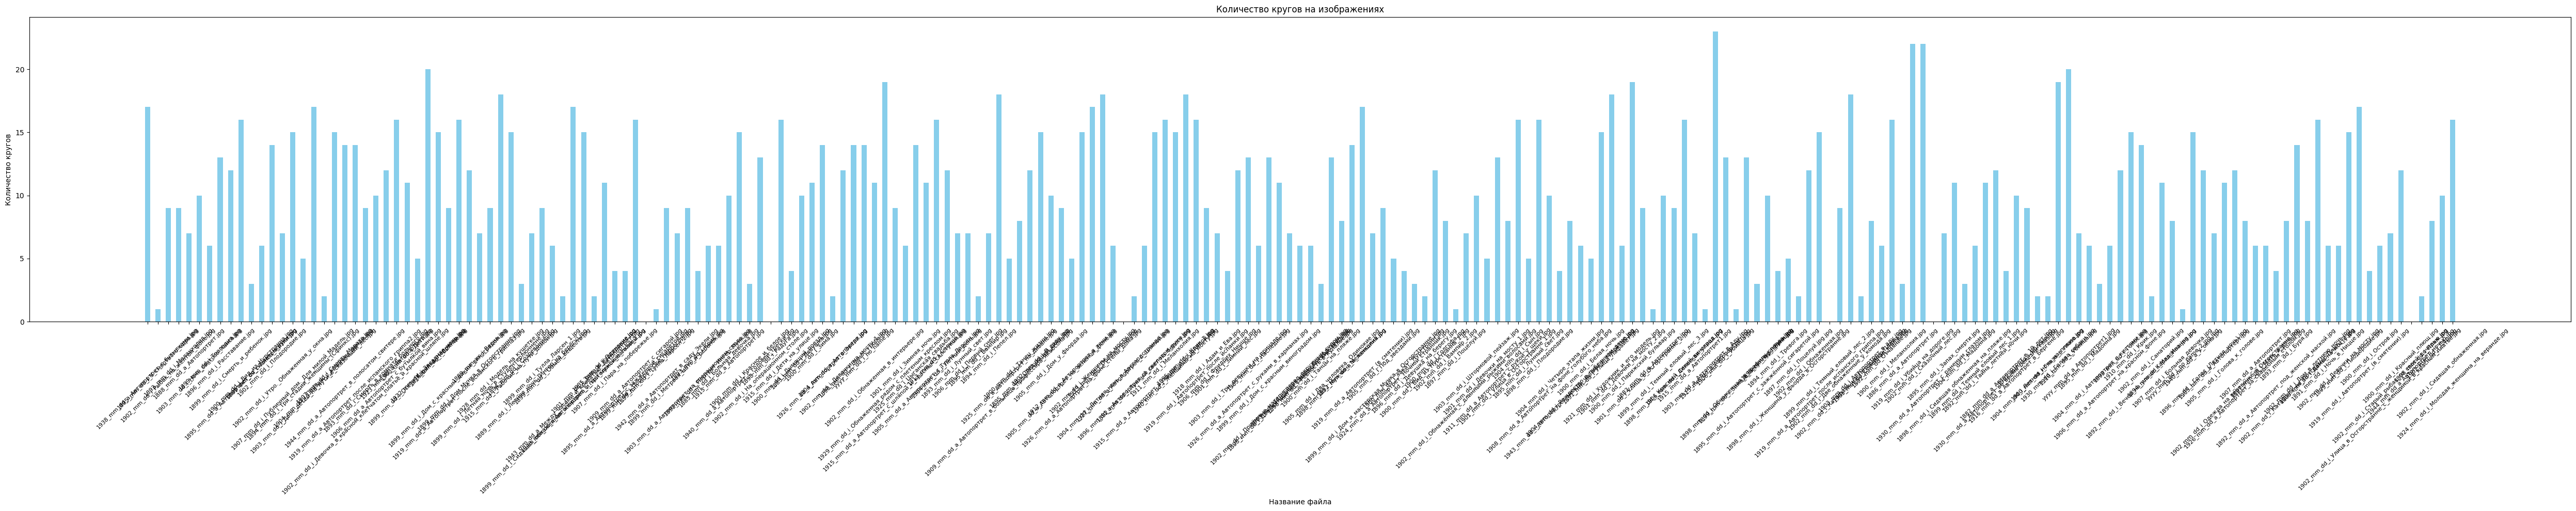

In [57]:
plot_results(results)

#### Смотрим количество кружков за каждый год

In [60]:
def process_images(folder_path):
    results = {}

    for filename in tqdm(os.listdir(folder_path)):
        if filename.lower().endswith(('.jpeg', '.jpg', '.png')):
            filepath = os.path.join(folder_path, filename)

            year = filename.split('_')[0]
            if year == "yyyy":
                continue

            image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (128, 128))

            blurred = cv2.GaussianBlur(image, (9, 9), 2)

            circles = cv2.HoughCircles(
                blurred, 
                cv2.HOUGH_GRADIENT, 
                dp=1.2, 
                minDist=20, 
                param1=50, 
                param2=30, 
                minRadius=10, 
                maxRadius=100
            )

            num_circles = 0 if circles is None else len(circles[0])

            if year not in results:
                results[year] = 0
            results[year] += num_circles

    return results

results = process_images(folder_path)

100%|██████████| 224/224 [00:03<00:00, 62.72it/s]


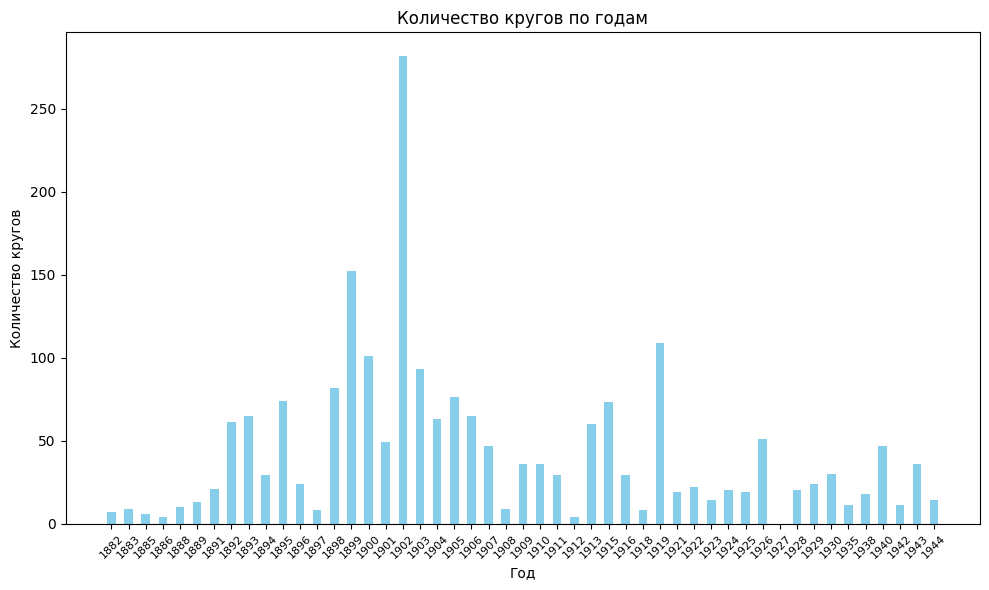

In [61]:
def plot_results(results):
    sorted_results = dict(sorted(results.items()))
    years = list(sorted_results.keys())
    values = list(sorted_results.values())
    bar_width = 0.5
    plt.figure(figsize=(10, 6))
    plt.bar(years, values, color='skyblue', width=bar_width)
    plt.xlabel('Год')
    plt.ylabel('Количество кругов')
    plt.title('Количество кругов по годам')
    plt.xticks(rotation=45, fontsize=8)
    plt.tight_layout()
    plt.show()
    
plot_results(results)

## Смотрим средний радиус кружков

In [62]:
def process_images(folder_path):
    results = {}

    for filename in tqdm(os.listdir(folder_path)):
        if filename.lower().endswith(('.jpeg', '.jpg', '.png')):
            filepath = os.path.join(folder_path, filename)

            year = filename.split('_')[0]
            if year == "yyyy":
                continue

            image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            h, w = image.shape[:2]  
            image_area = h * w  

            image = cv2.resize(image, (128, 128)) 
            blurred = cv2.GaussianBlur(image, (9, 9), 2)

            circles = cv2.HoughCircles(
                blurred, 
                cv2.HOUGH_GRADIENT, 
                dp=1.2, 
                minDist=20, 
                param1=50, 
                param2=30, 
                minRadius=10, 
                maxRadius=100
            )

            if circles is not None:
                circles = np.round(circles[0, :]).astype("int")

                if year not in results:
                    results[year] = {"num_circles": 0, "radius_sum": 0, "normalized_radius_sum": 0}

                for (x, y, r) in circles:
                    normalized_radius = r / np.sqrt(image_area) 

                    results[year]["num_circles"] += 1
                    results[year]["radius_sum"] += r
                    results[year]["normalized_radius_sum"] += normalized_radius

    for year in results:
        if results[year]["num_circles"] > 0:
            results[year]["average_radius"] = results[year]["radius_sum"] / results[year]["num_circles"]
            results[year]["average_normalized_radius"] = results[year]["normalized_radius_sum"] / results[year]["num_circles"]
        else:
            results[year]["average_radius"] = 0
            results[year]["average_normalized_radius"] = 0

    return results

results = process_images(folder_path)

100%|██████████| 224/224 [00:03<00:00, 61.42it/s]


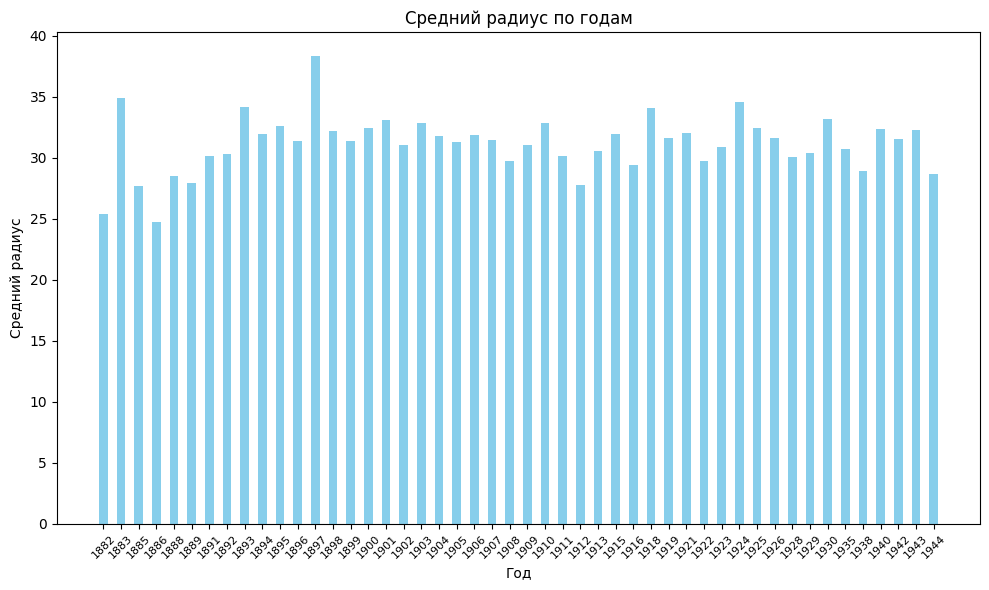

In [63]:
results_count = {year: data["average_radius"] for year, data in results.items()}

def plot_results(results):
    sorted_results = dict(sorted(results.items()))
    years = list(sorted_results.keys())
    values = list(sorted_results.values())
    bar_width = 0.5
    plt.figure(figsize=(10, 6))
    plt.bar(years, values, color='skyblue', width=bar_width)
    plt.xlabel('Год')
    plt.ylabel('Средний радиус')
    plt.title('Средний радиус по годам')
    plt.xticks(rotation=45, fontsize=8)
    plt.tight_layout()
    plt.show()

plot_results(results_count)

## Смотрим среднеквадратичное отклонение

In [64]:
def process_images(folder_path):
    results = {}

    for filename in tqdm(os.listdir(folder_path)):
        if filename.lower().endswith(('.jpeg', '.jpg', '.png')):
            filepath = os.path.join(folder_path, filename)

            year = filename.split('_')[0]
            if year == "yyyy":
                continue

            image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            h, w = image.shape[:2] 
            image_area = h * w 

            image = cv2.resize(image, (128, 128))
            blurred = cv2.GaussianBlur(image, (9, 9), 2)

            circles = cv2.HoughCircles(
                blurred, 
                cv2.HOUGH_GRADIENT, 
                dp=1.2, 
                minDist=20, 
                param1=50, 
                param2=30, 
                minRadius=10, 
                maxRadius=100
            )

            if circles is not None:
                circles = np.round(circles[0, :]).astype("int")

                if year not in results:
                    results[year] = {
                        "num_circles": 0, 
                        "radius_sum": 0, 
                        "normalized_radius_sum": 0,
                        "radii": [],  
                        "normalized_radii": [] 
                    }

                for (x, y, r) in circles:
                    normalized_radius = r / np.sqrt(image_area) 

                    results[year]["num_circles"] += 1
                    results[year]["radius_sum"] += r
                    results[year]["normalized_radius_sum"] += normalized_radius
                    results[year]["radii"].append(r)
                    results[year]["normalized_radii"].append(normalized_radius)

    for year in results:
        if results[year]["num_circles"] > 0:
            num_circles = results[year]["num_circles"]
            
            # mean radii
            avg_radius = results[year]["radius_sum"] / num_circles
            avg_normalized_radius = results[year]["normalized_radius_sum"] / num_circles
            
            # std
            radii = np.array(results[year]["radii"])
            normalized_radii = np.array(results[year]["normalized_radii"])

            std_radius = np.std(radii)  
            std_normalized_radius = np.std(normalized_radii) 

            results[year]["average_radius"] = avg_radius
            results[year]["average_normalized_radius"] = avg_normalized_radius
            results[year]["std_radius"] = std_radius
            results[year]["std_normalized_radius"] = std_normalized_radius
        else:
            results[year]["average_radius"] = 0
            results[year]["average_normalized_radius"] = 0
            results[year]["std_radius"] = 0
            results[year]["std_normalized_radius"] = 0

    return results

results = process_images(folder_path)

100%|██████████| 224/224 [00:03<00:00, 61.46it/s]


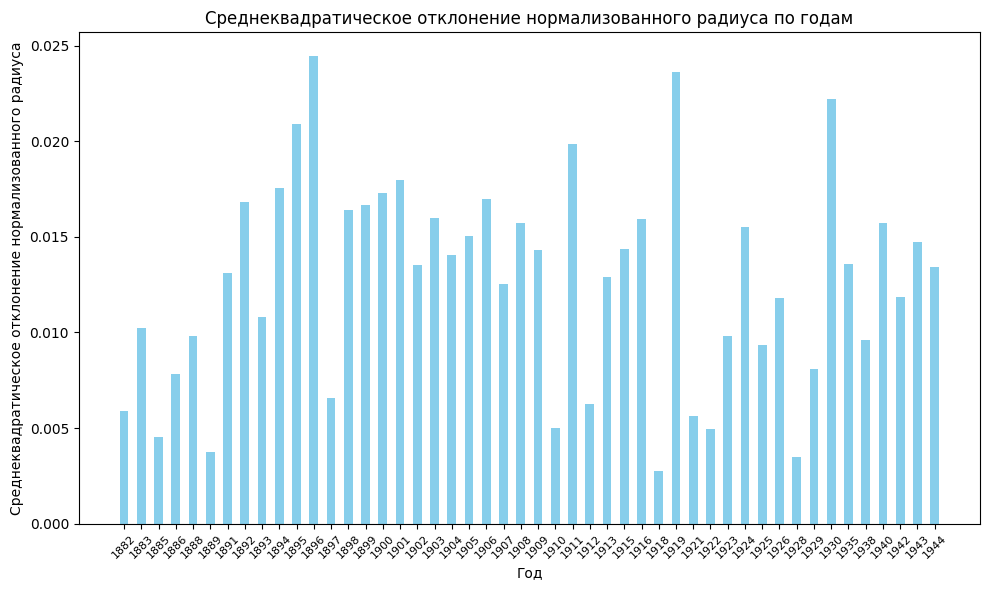

In [65]:
results_count = {year: results[year]["std_normalized_radius"] for year in results}

def plot_results(results):
    sorted_results = dict(sorted(results.items())) 
    years = list(sorted_results.keys()) 
    values = list(sorted_results.values())

    bar_width = 0.5
    plt.figure(figsize=(10, 6))
    plt.bar(years, values, color='skyblue', width=bar_width)
    
    plt.xlabel('Год')
    plt.ylabel('Среднеквадратическое отклонение нормализованного радиуса')
    plt.title('Среднеквадратическое отклонение нормализованного радиуса по годам')

    plt.xticks(rotation=45, fontsize=8)
    plt.tight_layout()
    plt.show()

plot_results(results_count)